In [51]:
# Import required libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
df = pd.read_csv("/content/news.csv")

In [ ]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.tail(5)

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [ ]:
df.shape

(6335, 4)

In [ ]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fe

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [ ]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

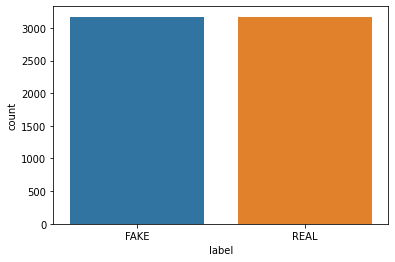

In [ ]:
sns.countplot(x='label', data=df)

Text(0.5, 1.0, 'Fake News Detection')

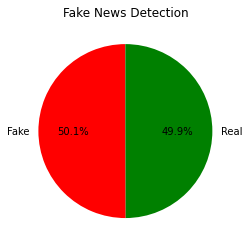

In [ ]:
labels = ['Fake', 'Real']
sizes = [df['label'].value_counts()[0], df['label'].value_counts()[1]]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Fake News Detection')

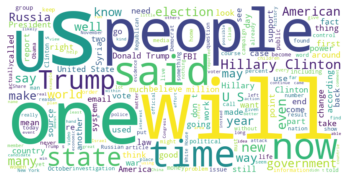

In [ ]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
# Combine all headlines into a single string
text = ' '.join(df[df['label'] == 'FAKE']['text'].tolist())
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [ ]:
print("shape of the train data:",X_train.shape)
print("shape of the test data:",X_test.shape)

shape of the train data: (5068,)
shape of the test data: (1267,)


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
nb_predictions = nb_classifier.predict(count_test)

In [ ]:
nb_cm = confusion_matrix(y_test, nb_predictions)
print('Confusion Matrix:\n', nb_cm)

Confusion Matrix:
 [[544  84]
 [ 44 595]]


In [ ]:
nb_accuracy = accuracy_score(y_test, nb_predictions)
print('Accuracy:', nb_accuracy)

Accuracy: 0.898973954222573
